In [1]:
import tensorflow as tf
import keras
import numpy as np
!pip install livelossplot --quiet # library to plot training logs
from livelossplot import PlotLossesKeras
"Keras", keras.__version__, "tf", tf.__version__

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


('Keras', '2.1.6', 'tf', '1.8.0')

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

# simple norm
#x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

# z-score norm
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

170500096/170498071 [==============================] - 24s 0us/step


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    )
datagen.fit(x_train, augment=False)

In [40]:
def make_model(dropout=0.0):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
                   input_shape=(32, 32, 3)))
    #model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout > 0: model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout > 0: model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    if dropout > 0: model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='Adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

    return model

In [42]:
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
history = []

for dropout in dropouts:
    model = make_model(dropout)
    print(f"Running model with dropout {dropout}")
    
    hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64), 
                    steps_per_epoch=len(x_train) / 64, 
                    epochs=25, validation_data=(x_test, y_test), 
                    callbacks=[EarlyStopping(patience=4)])
    print(f"Model with dropout {dropout} finished with {max(hist.history['val_acc'])} accuracy")
    history.append(hist)

Running model with dropout 0.0
Epoch 1/25
782/781 [==============================] - 25s 32ms/step - loss: 1.3841 - acc: 0.5039 - val_loss: 1.0858 - val_acc: 0.6277
Epoch 2/25
782/781 [==============================] - 23s 30ms/step - loss: 0.9672 - acc: 0.6593 - val_loss: 0.9278 - val_acc: 0.6834
Epoch 3/25
782/781 [==============================] - 24s 30ms/step - loss: 0.8088 - acc: 0.7172 - val_loss: 0.7743 - val_acc: 0.7356
Epoch 4/25
782/781 [==============================] - 23s 30ms/step - loss: 0.7058 - acc: 0.7544 - val_loss: 0.8297 - val_acc: 0.7199
Epoch 5/25
782/781 [==============================] - 24s 30ms/step - loss: 0.6398 - acc: 0.7770 - val_loss: 0.7527 - val_acc: 0.7537
Epoch 6/25
782/781 [==============================] - 23s 30ms/step - loss: 0.5901 - acc: 0.7930 - val_loss: 0.7239 - val_acc: 0.7711
Epoch 7/25
782/781 [==============================] - 23s 30ms/step - loss: 0.5489 - acc: 0.8086 - val_loss: 0.6515 - val_acc: 0.7853
Epoch 8/25
782/781 [===========

Epoch 3/25
782/781 [==============================] - 24s 31ms/step - loss: 0.9957 - acc: 0.6503 - val_loss: 0.8405 - val_acc: 0.7135
Epoch 4/25
782/781 [==============================] - 24s 30ms/step - loss: 0.9172 - acc: 0.6790 - val_loss: 0.8600 - val_acc: 0.7036
Epoch 5/25
782/781 [==============================] - 24s 30ms/step - loss: 0.8674 - acc: 0.6953 - val_loss: 0.7948 - val_acc: 0.7287
Epoch 6/25
782/781 [==============================] - 24s 30ms/step - loss: 0.8380 - acc: 0.7080 - val_loss: 0.7504 - val_acc: 0.7446
Epoch 7/25
782/781 [==============================] - 24s 30ms/step - loss: 0.8090 - acc: 0.7158 - val_loss: 0.7654 - val_acc: 0.7406
Epoch 8/25
782/781 [==============================] - 23s 30ms/step - loss: 0.7834 - acc: 0.7253 - val_loss: 0.6737 - val_acc: 0.7716
Epoch 9/25
782/781 [==============================] - 24s 31ms/step - loss: 0.7724 - acc: 0.7286 - val_loss: 0.6854 - val_acc: 0.7687
Epoch 10/25
782/781 [==============================] - 24s 30m

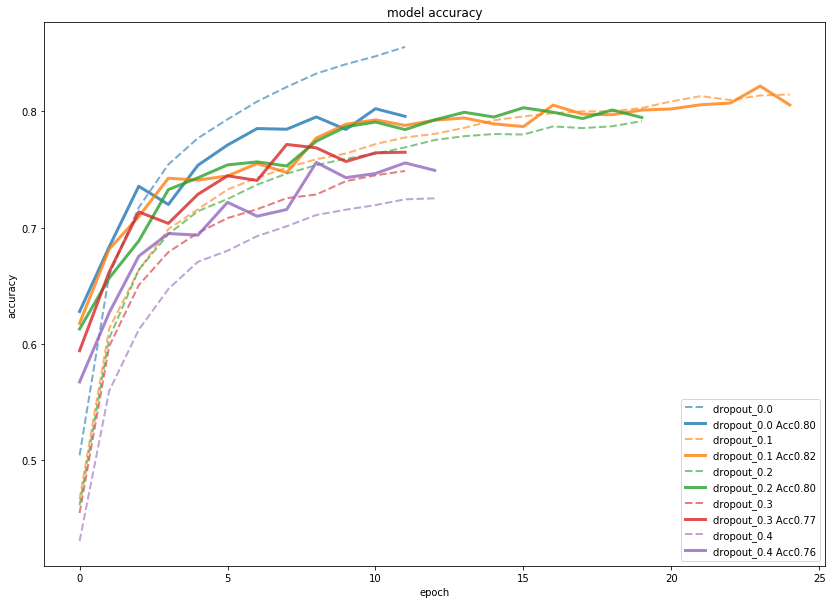

In [48]:
 import matplotlib.pyplot as plt
%matplotlib inline

colors = ["C"+str(i) for i in range(5)]
fig = plt.figure(figsize=(14,10))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

for dropout, hist, color in zip(dropouts, history, colors):
  plt.plot(hist.history['acc'], label=f"dropout_{dropout:.1f} ", ls="dashed", lw=2, alpha=0.6, c=color)
  plt.plot(hist.history['val_acc'], label=f"dropout_{dropout:.1f} Acc{max(hist.history['val_acc']):.2f}", ls="solid", lw=3, alpha=0.8, c=color)
  
plt.legend()
plt.show()

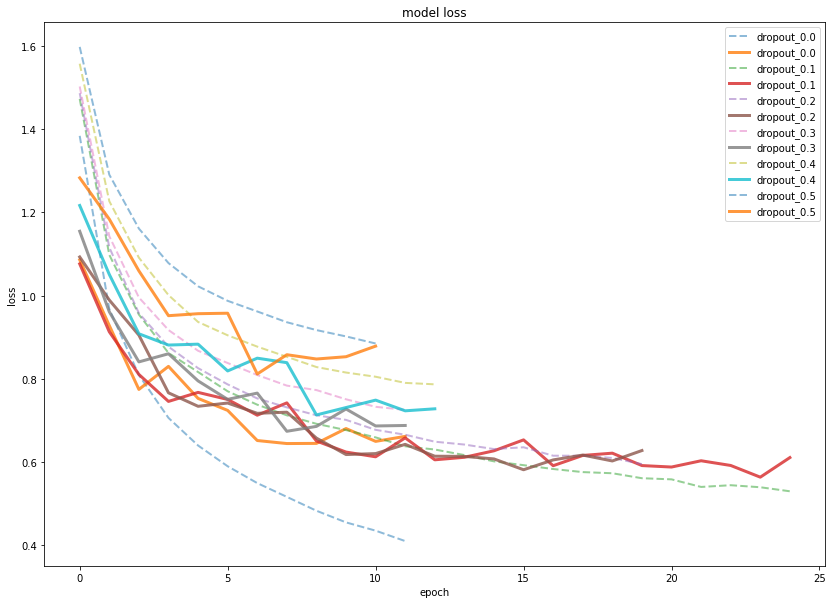

In [49]:
fig = plt.figure(figsize=(14,10))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

for dropout, hist in zip(dropouts, history):
  plt.plot(hist.history['loss'], label=f"dropout_{dropout:.1f}", ls="dashed", lw=2, alpha=0.5)
  plt.plot(hist.history['val_loss'], label=f"dropout_{dropout:.1f}", ls="solid", lw=3, alpha=0.8)
  
plt.legend()
plt.show()